## Imports

In [4]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "4"
import tensorflow as tf

tf.get_logger().setLevel("ERROR")


### Extract the weights for all 25 hidden layers

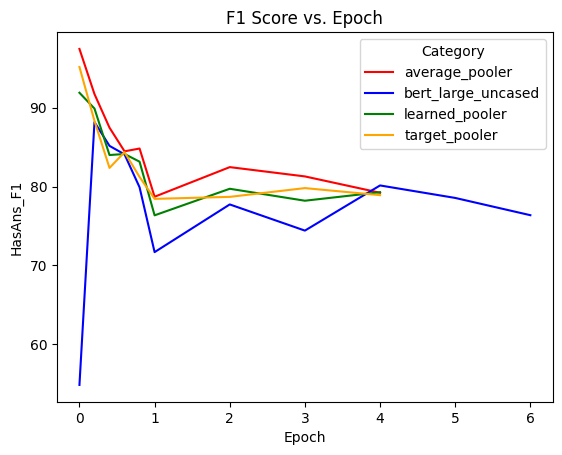

In [6]:
# Read the CSV file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("./results/metrics_combined.csv")

# Define a color mapping dictionary
color_mapping = {
    "average_pooler": "red",
    "bert_large_uncased": "blue",
    "learned_pooler": "green",
    "target_pooler": "orange",
}

# Plot the line plot using Seaborn
sns.lineplot(data=data, x="Epoch", y="NoAns_F1", hue="Category", palette=color_mapping)

# Set the labels and title
plt.xlabel("Epoch")
plt.ylabel("HasAns_F1")
plt.title("F1 Score vs. Epoch")

# Show the plot
plt.show()


In [4]:
data


,Epoch,Category,Model Name,Exact,F1,HasAns_Exact,HasAns_F1,NoAns_Exact,NoAns_F1
0,0.0,average_pooler,average_pooler_epochs_00,49.4820,49.6178,1.4001,1.6722,97.4264,97.4264
1,0.0,bert_large_uncased,bert_large_uncased_epochs_00,27.4741,28.3034,0.0000,1.6609,54.8696,54.8696
2,0.0,learned_pooler,learned_pooler_epochs_00,48.7830,49.3082,5.5668,6.6187,91.8755,91.8755
3,0.0,target_pooler,target_pooler_epochs_00,49.8358,50.1570,4.4028,5.0463,95.1388,95.1388
4,0.2,average_pooler,average_pooler_epochs_20,52.5562,53.4576,13.2928,15.0982,91.7073,91.7073
5,0.2,bert_large_uncased,bert_large_uncased_20,52.5646,54.0334,16.8691,19.8108,88.1581,88.1581
6,0.2,learned_pooler,learned_pooler_epochs_20,53.7185,54.9628,17.4595,19.9516,89.8738,89.8738
7,0.2,target_pooler,target_pooler_epochs_20,53.9291,55.3912,19.4501,22.3785,88.3095,88.3095
8,0.4,average_pooler,average_pooler_epochs_40,58.2582,60.4072,28.9811,33.2852,87.4516,87.4516
9,0.4,bert_large_uncased,bert_large_uncased_40,59.1342,61.6435,33.0466,38.0724,85.1472,85.1472


### analyze the history files of the target pooler model

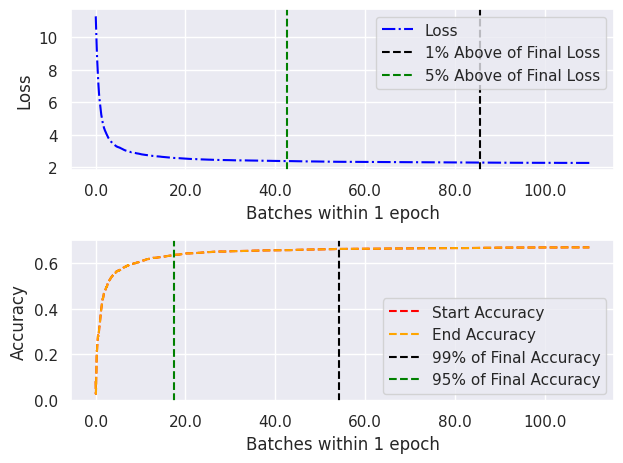

In [38]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

(losses, start_accuracies, end_accuracies) = joblib.load(
    "./models/target_pooler_epochs_01/target_pooler_epochs_01_histories_by_batch.pkl", "r"
)

sns.set(style="darkgrid")

# Calculate the tick positions and labels
total_count = len(losses)
tick_positions = np.arange(0, total_count, 1000)
tick_labels = [i for i in np.linspace(0, 100, len(tick_positions))]

# Plot loss chart
plt.subplot(2, 1, 1)
plt.plot(losses, label="Loss", linestyle="dashdot", color="blue")
plt.xlabel("Batches within 1 epoch")
plt.ylabel("Loss")
plt.xticks(tick_positions, tick_labels)

# Add vertical line for 95% of last loss
last_loss = losses[-1]
plt.axvline(
    x=losses.index(next(x for x in losses if x <= 1.01 * last_loss)),
    color="black",
    linestyle="--",
    label="1% Above of Final Loss",
)
plt.axvline(
    x=losses.index(next(x for x in losses if x <= 1.05 * last_loss)),
    color="green",
    linestyle="--",
    label="5% Above of Final Loss",
)
plt.legend()

# Plot accuracy chart
plt.subplot(2, 1, 2)
plt.plot(start_accuracies, label="Start Accuracy", linestyle="--", color="red")
plt.plot(end_accuracies, label="End Accuracy", linestyle="--", color="orange")
plt.xlabel("Batches within 1 epoch")
plt.ylabel("Accuracy")
plt.xticks(tick_positions, tick_labels)

# Add vertical line for 95% of last loss
final_acc = end_accuracies[-1]
plt.axvline(
    x=end_accuracies.index(next(x for x in end_accuracies if x >= 0.99 * final_acc)),
    color="black",
    linestyle="--",
    label="99% of Final Accuracy",
)
plt.axvline(
    x=end_accuracies.index(next(x for x in end_accuracies if x >= 0.95 * final_acc)),
    color="green",
    linestyle="--",
    label="95% of Final Accuracy",
)
plt.legend()


plt.tight_layout()  # Adjust spacing between subplots
plt.show()


Total number of the batches:

In [19]:
len(start_accuracies)


5497

Final Accuraracy

In [21]:
start_accuracies[-1]


0.6673287153244019

In [28]:
start_accuracies[int(total_count * 0.4)]


0.6558473706245422